In [3]:
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

EXPLORATORY DATA ANALYSIS

In [9]:
#load the dataset
df = pd.read_csv('bank_new.csv', delimiter=';')
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)       
pd.set_option('display.max_colwidth', 50) 

In [11]:
#show the first rows of the dataset 
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [13]:
#check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          5000 non-null   int64 
 1    job         5000 non-null   object
 2    marital     5000 non-null   object
 3    education   5000 non-null   object
 4    default     5000 non-null   object
 5    balance     5000 non-null   int64 
 6    housing     5000 non-null   object
 7    loan        5000 non-null   object
 8    contact     5000 non-null   object
 9    day         5000 non-null   int64 
 10   month       5000 non-null   object
 11   duration    5000 non-null   int64 
 12   campaign    5000 non-null   int64 
 13   pdays       5000 non-null   int64 
 14   previous    5000 non-null   int64 
 15   poutcome    5000 non-null   object
 16   y           5000 non-null   object
dtypes: int64(7), object(10)
memory usage: 664.2+ KB


In [15]:
#summary of statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.0,5000.0
mean,40.415400,957.59300,12.36780,270.343000,2.375000,-1.0,0.0
std,9.412192,2462.15561,5.00607,257.151494,2.739539,0.0,0.0
min,20.000000,-3313.00000,5.00000,2.000000,1.000000,-1.0,0.0
25%,33.000000,56.00000,8.00000,122.000000,1.000000,-1.0,0.0
50%,40.000000,304.00000,13.00000,198.000000,2.000000,-1.0,0.0
75%,47.000000,894.50000,16.00000,325.000000,3.000000,-1.0,0.0
max,61.000000,58544.00000,21.00000,3366.000000,63.000000,-1.0,0.0


In [17]:
#identify unique values in category types
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in  job : [' management ' ' technician ' ' entrepreneur ' ' blue-collar '
 ' unknown ' ' retired ' ' admin. ' ' services ' ' self-employed '
 ' unemployed ' ' housemaid ' ' student ']
Unique values in  marital : [' married ' ' single ' ' divorced ']
Unique values in  education : [' tertiary ' ' secondary ' ' unknown ' ' primary ']
Unique values in  default : [' no ' ' yes ']
Unique values in  housing : [' yes ' ' no ']
Unique values in  loan : [' no ' ' yes ']
Unique values in  contact : [' unknown ']
Unique values in  month : [' may ']
Unique values in  poutcome : [' unknown ']
Unique values in  y : [' no ' ' yes ']


In [19]:
# take out spaces in column names
df.columns = df.columns.str.strip()

In [21]:
# drop not needed columns that do not provide meaning
df_cleaned = df.drop(columns=["contact", "pdays", "previous", "month", "poutcome"], errors='ignore')

# verify the cleaned DataFrame
print("Cleaned DataFrame columns:", df_cleaned.columns)

Cleaned DataFrame columns: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'y'], dtype='object')


In [23]:
data_encoded = pd.get_dummies(df_cleaned, drop_first=True) #hot encoding
data_encoded.columns = data_encoded.columns.str.replace(' ', '_').str.strip()  # Clean column names
data_encoded = data_encoded.astype(int)  # convert boolean columns to 0 or 1

In [25]:
#show the first 10 encoded columns 
print("Subset of Encoded DataFrame:")
print(data_encoded.iloc[:, :10].head())

Subset of Encoded DataFrame:
   age  balance  day  duration  campaign  job__blue-collar_  job__entrepreneur_  job__housemaid_  job__management_  job__retired_
0   58     2143    5       261         1                  0                   0                0                 1              0
1   44       29    5       151         1                  0                   0                0                 0              0
2   33        2    5        76         1                  0                   1                0                 0              0
3   47     1506    5        92         1                  1                   0                0                 0              0
4   33        1    5       198         1                  0                   0                0                 0              0


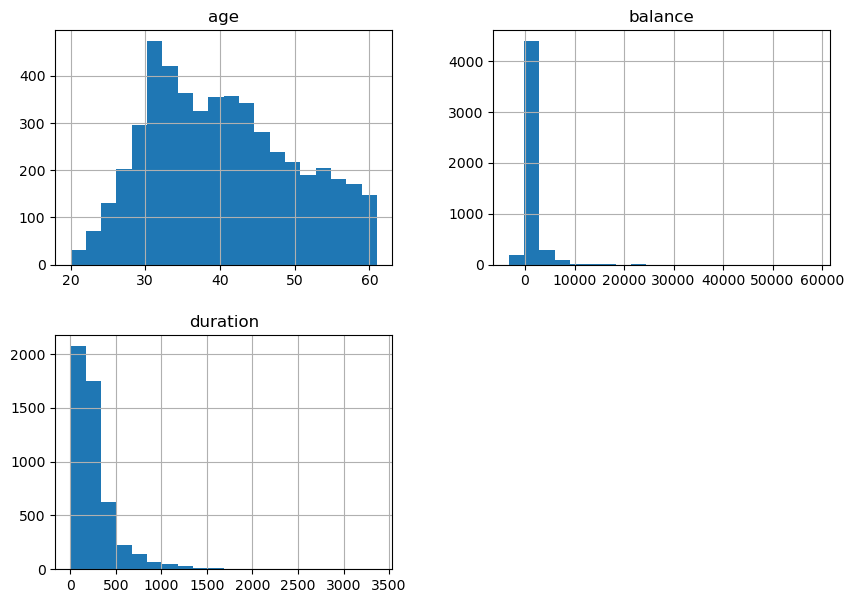

In [27]:
df_cleaned[['age', 'balance', 'duration']].hist(bins=20, figsize=(10, 7))
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_5884\1691747191.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df_cleaned, palette='Set2')


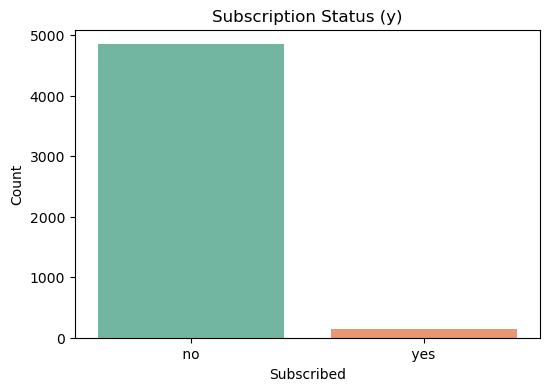

In [29]:
# bar plot for y variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df_cleaned, palette='Set2')
plt.title('Subscription Status (y)')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5884\2389724057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='balance', data=df_cleaned, palette='Set2')


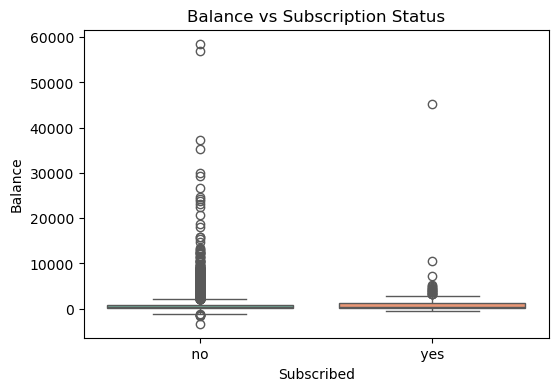

In [31]:
#boxplot of balance and subscription
plt.figure(figsize=(6, 4))
sns.boxplot(x='y', y='balance', data=df_cleaned, palette='Set2')
plt.title('Balance vs Subscription Status')
plt.xlabel('Subscribed')
plt.ylabel('Balance')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_5884\763916536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='duration', data=df_cleaned, palette='Set2')


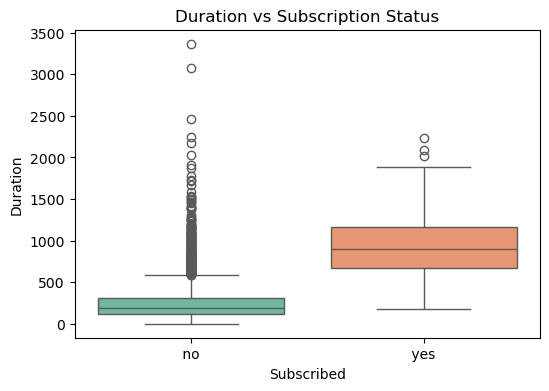

In [33]:
#boxplot of duration of the the call and subscription status
plt.figure(figsize=(6, 4))
sns.boxplot(x='y', y='duration', data=df_cleaned, palette='Set2')
plt.title('Duration vs Subscription Status')
plt.xlabel('Subscribed')
plt.ylabel('Duration')
plt.show()


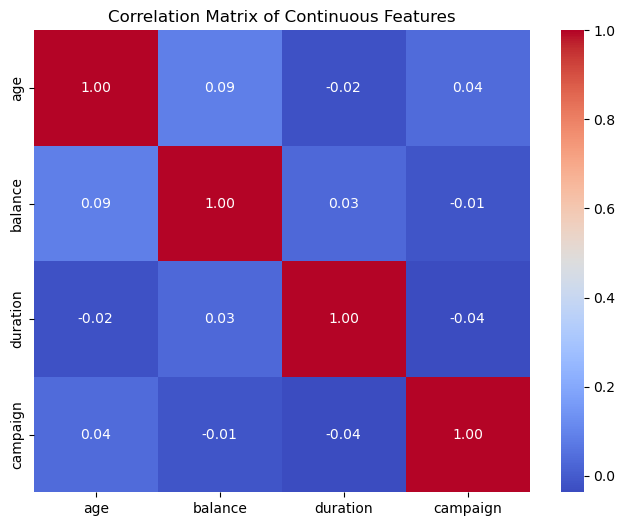

In [35]:
# correlation matrix for continuous variables
corr = df_cleaned[['age', 'balance', 'duration', 'campaign']].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Continuous Features')
plt.show()


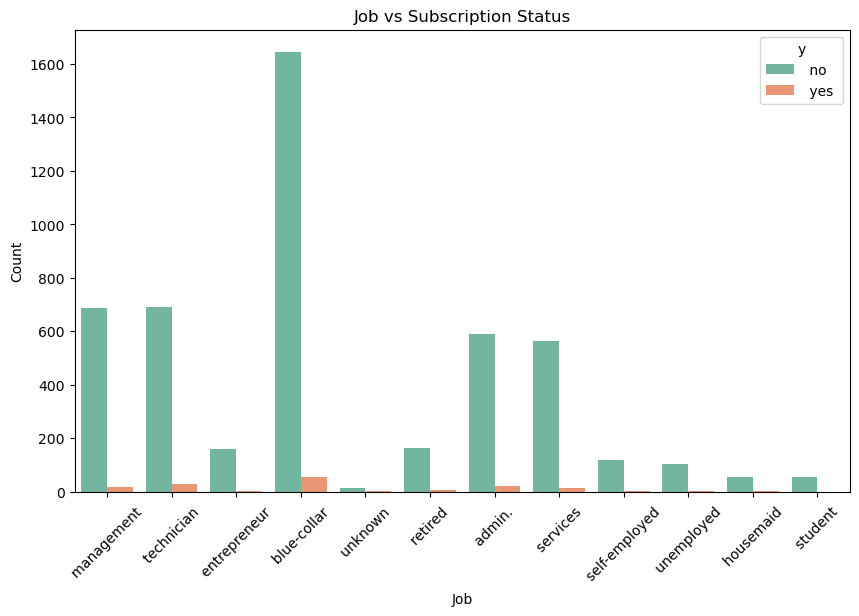

In [37]:
#countplot of job type and subscription status
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='y', data=df_cleaned, palette='Set2')
plt.title('Job vs Subscription Status')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


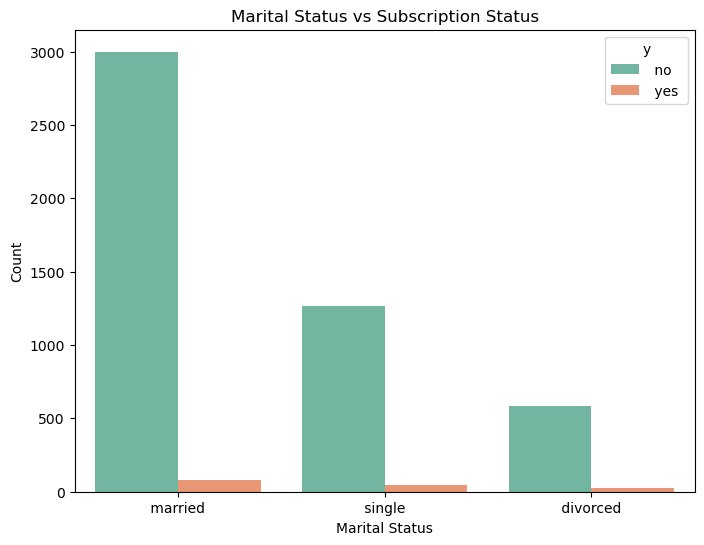

In [39]:
#countplot for marital statuses compared to subscription status
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='y', data=df_cleaned, palette='Set2')
plt.title('Marital Status vs Subscription Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


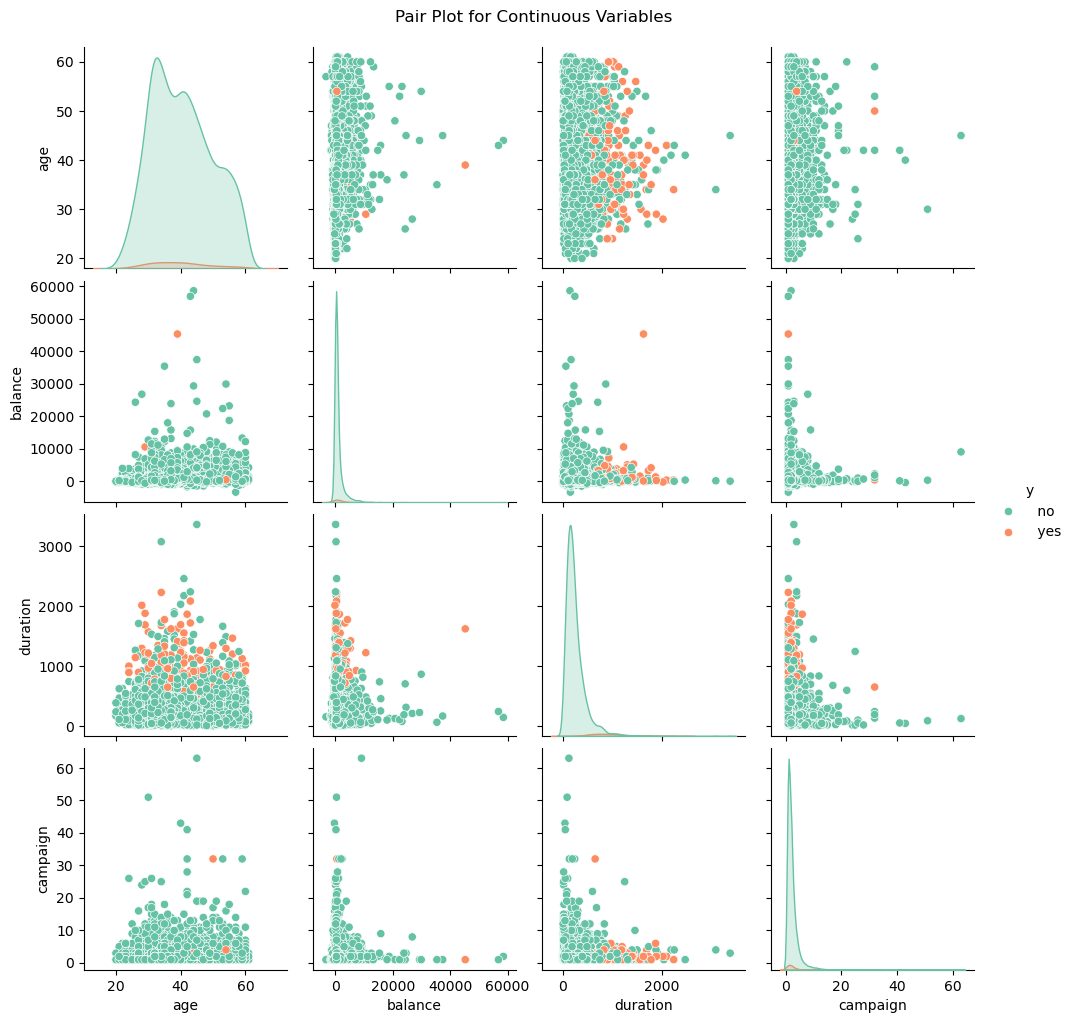

In [43]:
# pairplot relationships for continuous variables
sns.pairplot(df_cleaned[['age', 'balance', 'duration', 'campaign', 'y']], hue='y', palette='Set2')
plt.suptitle('Pair Plot for Continuous Variables', y=1.02)
plt.show()


LOGISTIC REGRESSION

In [47]:
#other neccessary imports for the algorithms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE  


In [49]:
X = data_encoded.drop(columns=["y__yes_"])  
y = data_encoded["y__yes_"]

In [51]:

#separate data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#shape of the splits
print(X_train.shape, X_test.shape)

(4000, 24) (1000, 24)


In [53]:
scaler = StandardScaler()
# fit scaler on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
#perform logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [57]:
# classification report
print(classification_report(y_test, y_pred))
#confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       965
           1       0.44      0.11      0.18        35

    accuracy                           0.96      1000
   macro avg       0.71      0.55      0.58      1000
weighted avg       0.95      0.96      0.95      1000

[[960   5]
 [ 31   4]]


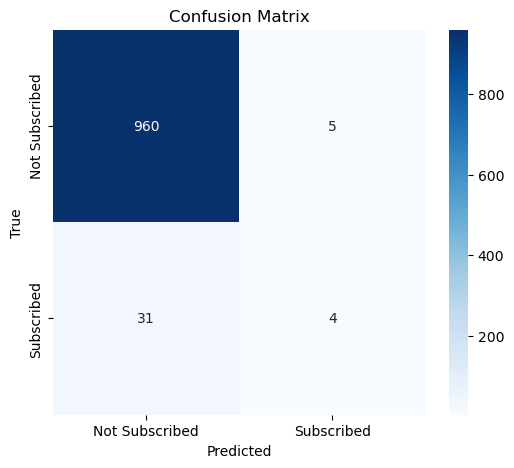

In [59]:
#illustrate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

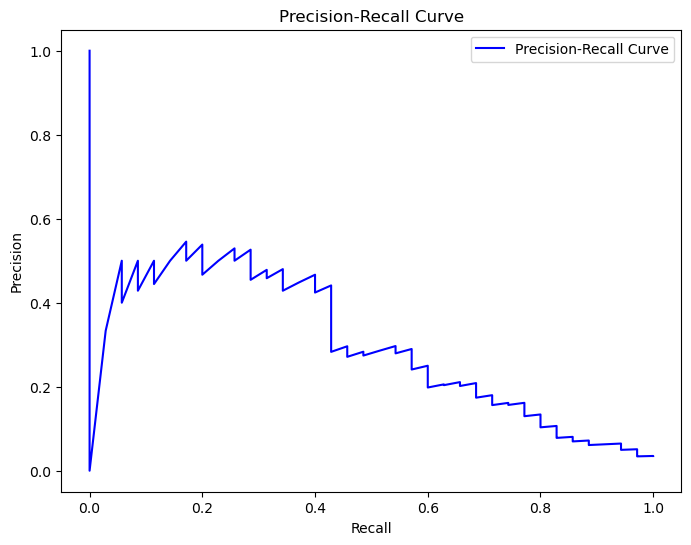

In [61]:
#necessary import
from sklearn.metrics import precision_recall_curve

# precision recall values
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
#illustration
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Decision Tree Algorithm

In [64]:
#import library for deccision tree
from sklearn.tree import DecisionTreeClassifier

In [66]:
#  train decision tree with the training data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [68]:
dt_pred = dt_model.predict(X_test_scaled)

In [70]:
#print classification report
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       965
           1       0.08      0.06      0.07        35

    accuracy                           0.94      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.94      0.94      0.94      1000

[[942  23]
 [ 33   2]]


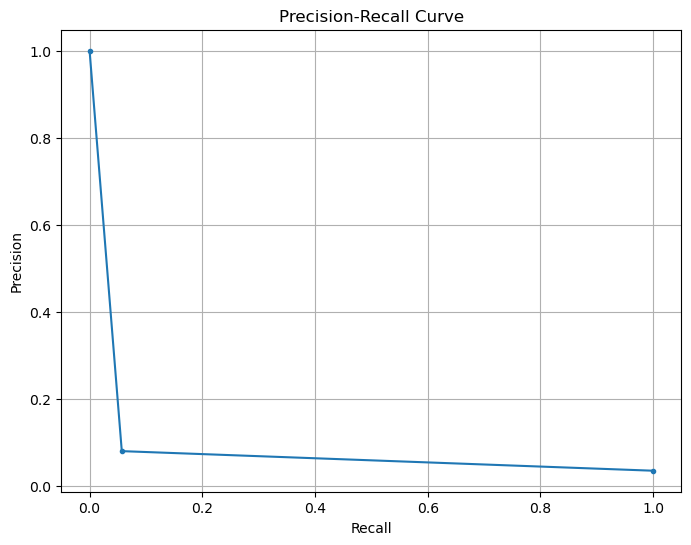

In [72]:
# calculate precision recall
precision, recall, _ = precision_recall_curve(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
# show
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

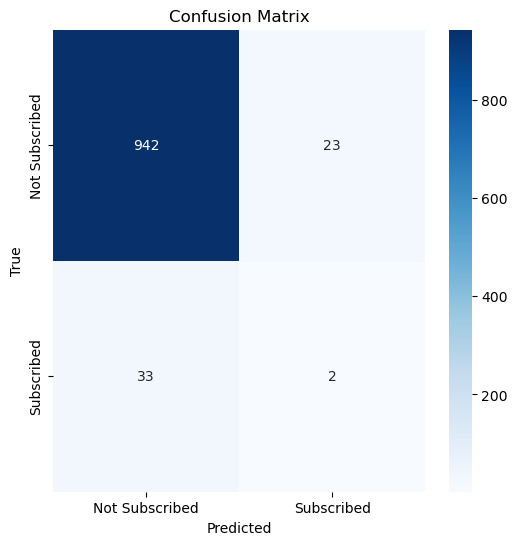

In [74]:
# confusion matriox
cm = confusion_matrix(y_test, dt_pred)
# show in heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Subscribed", "Subscribed"], yticklabels=["Not Subscribed", "Subscribed"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [76]:
#perform crros validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Average score: {scores.mean()}")


Cross-validation scores: [0.96375 0.96125 0.9625  0.95625 0.95375]
Average score: 0.9595


RANDOM FOREST CLASSIFIER

In [78]:
#import random forest library
from sklearn.ensemble import RandomForestClassifier

In [80]:
#create random model
rf_model = RandomForestClassifier(random_state=42)
#fit it on training data 
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [82]:
#do predictions on the test data
rf_pred = rf_model.predict(X_test_scaled)
#do classiification report
print("Classification Report:")
print(classification_report(y_test, rf_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.00      0.00      0.00        35

    accuracy                           0.96      1000
   macro avg       0.48      0.50      0.49      1000
weighted avg       0.93      0.96      0.95      1000



Confusion Matrix:
[[964   1]
 [ 35   0]]


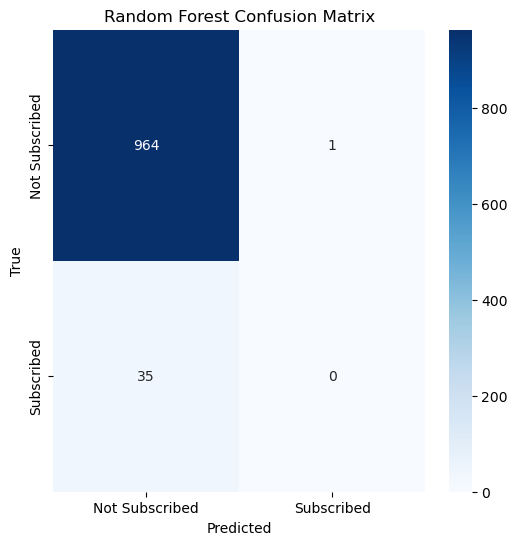

In [84]:
#do the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, rf_pred)
print(cm)
# show
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [86]:
 #cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {rf_cv_scores}")
print(f"Average cross-validation score: {rf_cv_scores.mean()}")

Cross-validation scores: [0.9725  0.9725  0.96875 0.9725  0.97   ]
Average cross-validation score: 0.9712500000000001


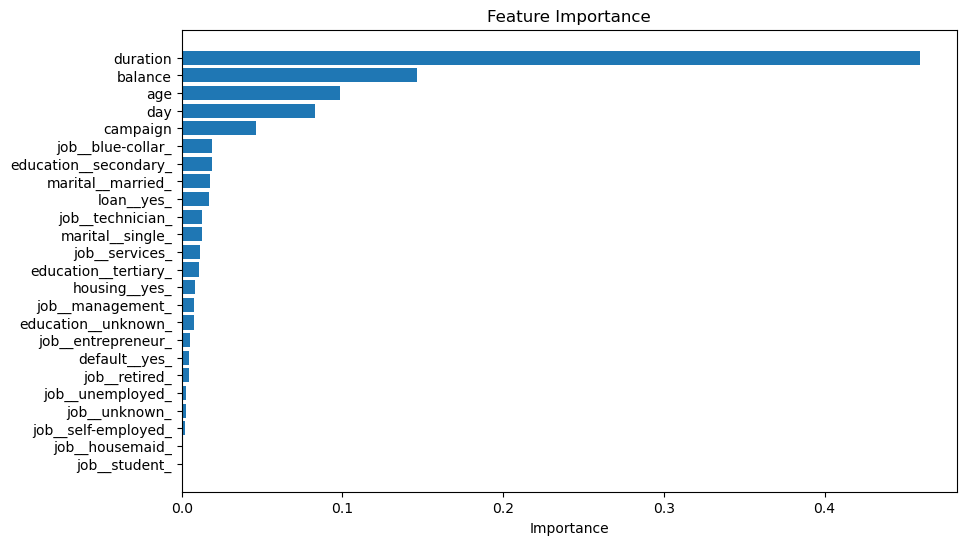

In [88]:
#show features importance
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns)
importances = rf_model.feature_importances_
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(X_train_scaled.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train_scaled.shape[1]), [X_train_scaled.columns[i] for i in indices])
plt.xlabel('Importance')
plt.show()